<div class="alert alert-block alert-warning">

<b>CAR PRICE PREDICTION EDA</b>
    
</div>

<div class="alert alert-block alert-danger">
    
<b>PART - 1 (Data Cleaning)</b>
    
</div>

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for Style
from colorama import Fore
from colorama import Style

import scipy.stats as stats

import warnings;
warnings.filterwarnings('ignore')

# plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 100

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_json('scout_car.json', lines=True)

<div class="alert alert-block alert-danger">
    
<b>DataFrame Review</b>
    
</div>

In [3]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [5]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [6]:
df.head(2).T

,0,1
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...
make_model,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport
body_type,Sedans,Sedans
price,15770,14500
vat,VAT deductible,Price negotiable
km,"56,013 km","80,000 km"
registration,01/2016,03/2017
prev_owner,2 previous owners,None
kW,NaN,NaN


In [7]:
df.columns = df.columns.str.strip().str.title()
df.columns

Index(['Url', 'Make_Model', 'Short_Description', 'Body_Type', 'Price', 'Vat',
       'Km', 'Registration', 'Prev_Owner', 'Kw', 'Hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection New', 'Warranty',
       'Full Service', 'Non-Smoking Vehicle', 'Null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. Of Doors',
       'Nr. Of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive Chain', 'Fuel', 'Consumption',
       'Co2 Emission', 'Emission Class', 'Comfort & Convenience',
       'Entertainment & Media', 'Extras', 'Safety & Security', 'Description',
       'Emission Label', 'Gears', 'Country Version', 'Electricity Consumption',
       'Last Service Date', 'Other Fuel Types', 'Availability',
       'Last Timing Belt Service Date', 'Available From'],
      dtype='object')

In [8]:
df.isnull().sum() / len(df)*100
# df.isnull().sum()*100/df.shape[0]

Url                               0.00
Make_Model                        0.00
Short_Description                 0.29
Body_Type                         0.38
Price                             0.00
Vat                              28.35
Km                                0.00
Registration                      0.00
Prev_Owner                       42.89
Kw                              100.00
Hp                                0.00
Type                              0.01
Previous Owners                  41.71
Next Inspection                  77.79
Inspection New                   75.30
Warranty                         34.05
Full Service                     48.39
Non-Smoking Vehicle              54.92
Null                              0.00
Make                              0.00
Model                             0.00
Offer Number                     19.94
First Registration               10.03
Body Color                        3.75
Paint Type                       36.26
Body Color Original      

### ***Droping columns that have %90 percent and higher of missing values***

In [9]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

In [10]:
show_nans(df,90)

Kw                              100.00
Electricity Consumption          99.14
Last Service Date                96.44
Other Fuel Types                 94.47
Availability                     96.01
Last Timing Belt Service Date    99.90
Available From                   98.29
dtype: float64

In [11]:
drop_columns = show_nans(df,90).index
drop_columns

Index(['Kw', 'Electricity Consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available From'],
      dtype='object')

In [12]:
df.drop(drop_columns, axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Url                    15919 non-null  object
 1   Make_Model             15919 non-null  object
 2   Short_Description      15873 non-null  object
 3   Body_Type              15859 non-null  object
 4   Price                  15919 non-null  int64 
 5   Vat                    11406 non-null  object
 6   Km                     15919 non-null  object
 7   Registration           15919 non-null  object
 8   Prev_Owner             9091 non-null   object
 9   Hp                     15919 non-null  object
 10  Type                   15917 non-null  object
 11  Previous Owners        9279 non-null   object
 12  Next Inspection        3535 non-null   object
 13  Inspection New         3932 non-null   object
 14  Warranty               10499 non-null  object
 15  Full Service       

In [14]:
df.dtypes.value_counts()

object    46
int64      1
dtype: int64

In [15]:
df.shape

(15919, 47)

In [16]:
df.size

748193

In [17]:
df.astype(str).duplicated(keep=False).value_counts()
# df.loc[df.astype(str).drop_duplicates().index]

False    15919
dtype: int64

<div class="alert alert-block alert-danger">
    
<b>Functions</b>
    
</div>

In [18]:
# if the data frame column contains list type elements, this function will return the element counts of the lists
# and it will show whether the data frame contains nested list/lists

# this function will be useful for detecting lists with different numbers of elements 
# that cannot be fully understood with the value_counts function

def list_items(column):

    len_of_lists = []
    count = 0

    for x in df[column]:
        if type(x)==list:
            len_of_lists.append(len(x))
            
            if any(type(i) == list for i in x):
                count += 1 
                            
    print('Number of Items in all Lists:', set(len_of_lists))
    
    if count > 0: print(f'This column has {Fore.RED}nested list/lists{Style.RESET_ALL}')
    else: print(f'There is {Fore.BLUE}no nested list{Style.RESET_ALL} in this column')

In [19]:
# this function returns lists with specified number of items

def specified_lists(column, x):

    count = 0
    
    for i in df[column]:
        if type(i)==list and len(i)==x:
            print(i)
            count += 1
            
        if count == 20:
            break;

<div class="alert alert-block alert-danger">
    
<b>Columns Review</b>
    
</div>

<div class="alert alert-block alert-info">

<b>Url</b></div>

In [20]:
df['Url'].value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [21]:
df['Url'].map(type).value_counts()

<class 'str'>    15919
Name: Url, dtype: int64

In [22]:
# df.Url column has unique values for each row

del df['Url']
# df.drop("Url", axis = 1, inplace = True)

<div class="alert alert-block alert-info">

<b>Make Model - Make - Model</b></div>

In [23]:
df['Make_Model'].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: Make_Model, dtype: int64

In [24]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [25]:
df.Model.astype(str).value_counts(dropna=False)

['\n', 'A3', '\n']          3097
['\n', 'A1', '\n']          2614
['\n', 'Insignia', '\n']    2598
['\n', 'Astra', '\n']       2526
['\n', 'Corsa', '\n']       2219
['\n', 'Clio', '\n']        1839
['\n', 'Espace', '\n']       991
['\n', 'Duster', '\n']        34
['\n', 'A2', '\n']             1
Name: Model, dtype: int64

In [26]:
# the values in the df['Make_Model'] column match the values in the df.Make and df.Model columns

del df['Make'], df['Model']

<div class="alert alert-block alert-info">

<b>Short Description - Description</b></div>

In [27]:
df['Short_Description'].value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: Short_Description, Length: 10002, dtype: int64

In [28]:
df['Short_Description'].map(type).value_counts()

<class 'str'>         15873
<class 'NoneType'>       46
Name: Short_Description, dtype: int64

In [29]:
df['Short_Description'].unique().shape[0]

10002

In [30]:
# too many unique values and it doesn't look like useful

del df['Short_Description']
# df.drop("Short_Description", axis = 1, inplace = True)

***

In [31]:
df['Description'].astype(str).value_counts(dropna=False).head()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [32]:
df['Description'].map(type).value_counts()

<class 'list'>    15919
Name: Description, dtype: int64

In [33]:
# length of each row is very long and the data contains german expressions

del df['Description']

<div class="alert alert-block alert-info">

<b>Body Type - Body</b></div>

In [34]:
# Body_Type Column

df['Body_Type'].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64

In [35]:
# Body Column

df['Body'].astype(str).value_counts(dropna=False)

['\n', 'Sedans', '\n']           7903
['\n', 'Station wagon', '\n']    3553
['\n', 'Compact', '\n']          3153
['\n', 'Van', '\n']               783
['\n', 'Other', '\n']             290
['\n', 'Transporter', '\n']        88
nan                                60
['\n', 'Off-Road', '\n']           56
['\n', 'Coupe', '\n']              25
['\n', 'Convertible', '\n']         8
Name: Body, dtype: int64

In [36]:
# the df.Body column contains exactly the same values as the df.Body_Type column

del df['Body']

<div class="alert alert-block alert-info">

<b>Price</b></div>

In [37]:
# df.Price is the target column

In [38]:
df.Price

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: Price, Length: 15919, dtype: int64

In [39]:
df.Price.map(type).value_counts()

<class 'int'>    15919
Name: Price, dtype: int64

In [40]:
df.Price.isnull().sum()

0

In [41]:
df.Price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: Price, dtype: float64

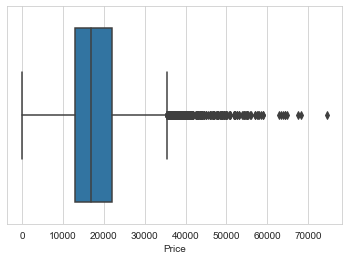

In [42]:
sns.boxplot(df.Price);

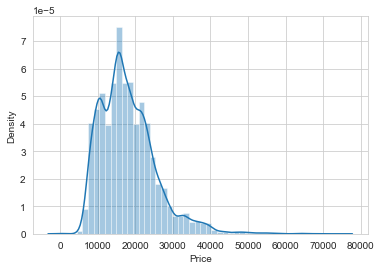

In [43]:
sns.distplot(df.Price);

<div class="alert alert-block alert-info">

<b>Vat</b>
    
<br>The Value Added Tax, or VAT, in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services. It applies more or less to all goods and services that are bought and sold for use or consumption in the European Union.</div>

In [44]:
df['Vat'].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: Vat, dtype: int64

In [45]:
df.Vat.map(type).value_counts()

<class 'str'>         11406
<class 'NoneType'>     4513
Name: Vat, dtype: int64

In [46]:
df['Vat'].isnull().sum() / len(df.Vat)*100
# df['Vat'].isnull().sum() / df.Vat.shape[0]*100

28.349770714240847

<div class="alert alert-block alert-info">

<b>Km</b></div>

In [47]:
df['Km'].value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: Km, Length: 6690, dtype: int64

In [48]:
df['Km'].map(type).value_counts()

<class 'str'>    15919
Name: Km, dtype: int64

In [49]:
df['Km'].isnull().sum()

0

In [50]:
df['Km'] = df['Km'].str.replace(',', '').str.extract('(\d+)').astype(float)

# df["Km"] = df.Km.str.replace(',','').str.extract('(\d{1,8})')[0].astype('float')
# Function of extract returns a dataframe

In [51]:
df['Km'].value_counts(dropna=False)

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: Km, Length: 6690, dtype: int64

In [52]:
df['Km'].isnull().sum()

1024

In [53]:
df[df.Km.isnull()].groupby([df.Type.str[1], df['First Registration'].str[1].astype(str)]).Type.count()

# Most of the null values can be considered as new and 0 km vehicles; the analysis about this will be done in the second part.

Type            First Registration
Demonstration   2019                   33
Employee's car  2018                    1
                2019                    6
                nan                     1
New             2018                    1
                2019                   14
                nan                   834
Pre-registered  2018                   27
                2019                   90
                nan                     1
Used            2017                    1
                2018                    9
                2019                    4
                nan                     1
Name: Type, dtype: int64

<div class="alert alert-block alert-info">

<b>Registration - First Registration</b></div>

In [54]:
df['Registration'].value_counts(dropna=False).head(10)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
Name: Registration, dtype: int64

In [55]:
df['Registration'].map(type).value_counts()

<class 'str'>    15919
Name: Registration, dtype: int64

In [56]:
df['Registration'].isnull().sum()

0

***

In [57]:
df['First Registration'].astype(str).value_counts(dropna=False)

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: First Registration, dtype: int64

In [58]:
df['First Registration'].map(type).value_counts()

<class 'list'>     14322
<class 'float'>     1597
Name: First Registration, dtype: int64

In [59]:
df['First Registration'] = df['First Registration'].str[1].str.strip()

In [60]:
df['First Registration'].value_counts(dropna=False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: First Registration, dtype: int64

In [61]:
# Some NaN values cannot be interpreted as new

df[(df['First Registration'].isnull()) & (df['Km'] > 10000)][['Registration','First Registration', 'Km']]

,Registration,First Registration,Km
1174,-/-,NaN,22627.00
1288,-/-,NaN,22627.00
2395,-/-,NaN,11200.00
6237,-/-,NaN,85000.00
7370,-/-,NaN,68485.00
8794,-/-,NaN,81800.00
8869,-/-,NaN,39962.00
8937,-/-,NaN,39962.00
9253,-/-,NaN,32084.00
9254,-/-,NaN,20768.00


In [62]:
# values are belong to 2019 data so we can calculate their ages

df['Age'] = 2019 - df['First Registration'].astype(float)

In [63]:
df['Age'].value_counts(dropna=False)

1.00    4522
3.00    3674
2.00    3273
0.00    2853
NaN     1597
Name: Age, dtype: int64

In [64]:
# we don't need these columns anymore

del df['First Registration'], df['Registration']

<div class="alert alert-block alert-info">

<b>Prev_Owner - Previous Owners</b></div>

In [65]:
df['Prev_Owner'].value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: Prev_Owner, dtype: int64

In [66]:
df['Prev_Owner'].isnull().sum() / len(df['Prev_Owner'])*100

42.892141466172504

***

In [67]:
df['Previous Owners'].astype(str).value_counts(dropna=False)

\n1\n                                                                                                        8101
nan                                                                                                          6640
\n2\n                                                                                                         766
\n0\n                                                                                                         163
\n3\n                                                                                                          17
                                                                                                             ... 
['\n1\n', '\n111 g CO2/km (comb)\n']                                                                            1
['\n1\n', '\nEuro 6\n']                                                                                         1
['\n2\n', '\n119 g CO2/km (comb)\n']                                                    

In [68]:
df['Previous Owners'].map(type).value_counts()

<class 'str'>      9049
<class 'float'>    6640
<class 'list'>      230
Name: Previous Owners, dtype: int64

In [69]:
list_items('Previous Owners')

Number of Items in all Lists: {8, 1, 2}
There is no nested list in this column


In [70]:
# I can see the 2 and 8 item lists above but now I need to see the single item lists

specified_lists('Previous Owners',1)

['\n1\n']
['\n1\n']


In [71]:
df['Previous Owners'] = [x[0] if type(x)==list else x for x in df['Previous Owners']]

In [72]:
df['Previous Owners'] = df['Previous Owners'].str.strip()

In [73]:
df['Previous Owners'].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: Previous Owners, dtype: int64

In [74]:
# NaN values are exactly matching

df[df[['Prev_Owner','Previous Owners']].isnull().all(axis=1)][['Prev_Owner','Previous Owners']].shape[0]

6640

In [75]:
df.rename(columns={'Previous Owners': 'Previous_Owners'}, inplace=True)

In [76]:
del df['Prev_Owner']
# df.drop("Prev_Owner", axis = 1, inplace = True)

<div class="alert alert-block alert-info">

<b>Hp</b></div>

In [77]:
df['Hp'].value_counts(dropna=False).head()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
Name: Hp, dtype: int64

In [78]:
df['Hp'].map(type).value_counts()

<class 'str'>    15919
Name: Hp, dtype: int64

In [79]:
df['Hp'].isnull().sum()

0

In [80]:
df['Hp'] = df['Hp'].str.extract('(\d+)').astype(float)

#df.replace({"Hp" : {" kW" : ""}}, regex = True, inplace = True)
#df["Hp_kw"] = pd.to_numeric(df.Hp)

In [81]:
df['Hp'].value_counts(dropna=False).head()

85.00     2542
66.00     2122
81.00     1402
100.00    1308
110.00    1112
Name: Hp, dtype: int64

In [82]:
df['Hp'].nunique()

80

In [83]:
df['Hp'].unique().shape[0]

81

In [84]:
df['Hp'].isnull().sum()

88

In [85]:
df.columns = df.columns.map(lambda x : x + '_kW' if x =='Hp' else x)

# df.rename(columns={'Hp': 'Hp_kW'}, inplace=True)
# df['Hp_kW'] = df['Hp']  //  del df['Hp']  // * it will be placed in the last of the df

<div class="alert alert-block alert-info">

<b>Type</b></div>

In [86]:
df['Type'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [87]:
df['Type'].map(type).value_counts()

<class 'list'>     15917
<class 'float'>        2
Name: Type, dtype: int64

In [88]:
list_items('Type')

Number of Items in all Lists: {4}
There is no nested list in this column


In [89]:
df['Type'] = df['Type'].str[1]

In [90]:
df.Type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

<div class="alert alert-block alert-info">

<b>Next Inspection - Inspection New</b></div>

In [91]:
df['Next Inspection'].astype(str).value_counts(dropna=False)

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next Inspection, Length: 1400, dtype: int64

In [92]:
df['Next Inspection'].map(type).value_counts()

<class 'float'>    12384
<class 'list'>      2825
<class 'str'>        710
Name: Next Inspection, dtype: int64

In [93]:
list_items('Next Inspection')

Number of Items in all Lists: {8, 1, 2, 6}
There is no nested list in this column


In [94]:
# I will check the lists that have only one item

specified_lists('Next Inspection',1)

['\n04/2021\n']
['\n04/2016\n']
['\n10/2019\n']
['\n04/2019\n']
['\n04/2019\n']
['\n08/2019\n']
['\n01/2021\n']
['\n04/2021\n']
['\n09/2021\n']
['\n07/2019\n']
['\n03/2020\n']
['\n05/2021\n']
['\n05/2021\n']
['\n06/2021\n']
['\n06/2021\n']
['\n06/2021\n']
['\n06/2021\n']
['\n06/2021\n']
['\n06/2021\n']
['\n06/2021\n']


In [95]:
# lists with six items

specified_lists('Next Inspection',6)

['\n02/2021\n', '\n', '1.6 l/100 km (comb)', '\n', '\n', '\n']
['\n04/2021\n', '\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n06/2021\n', '\n', '5.9 l/100 km (comb)', '\n', '\n', '\n']


In [96]:
df['Next Inspection'] = [x[0] if type(x)==list else x for x in df['Next Inspection']]

In [97]:
df['Next Inspection'] = df['Next Inspection'].str.strip()

In [98]:
df['Next Inspection'].value_counts(dropna=False).head()

NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
Name: Next Inspection, dtype: int64

In [99]:
df['Next Inspection'].unique()

array(['06/2021', nan, '02/2020', '09/2019', '10/2019', '04/2020',
       '07/2020', '12/2019', '05/2019', '07/2019', '02/2021', '06/2019',
       '05/2020', '11/2019', '11/2020', '09/2021', '03/2020', '04/2021',
       '04/2019', '07/2021', '01/2021', '05/2022', '06/2020', '01/2019',
       '09/2020', '03/2021', '05/2021', '10/2020', '02/2019', '03/2019',
       '08/2020', '08/2019', '05/2018', '10/2018', '08/2022', '07/2022',
       '12/2020', '03/2022', '08/2021', '01/1999', '01/2020', '06/2018',
       '02/2022', '01/2022', '11/2021', '10/2021', '12/2021', '04/2022',
       '06/2022', '10/2022', '01/2018', '02/2023', '01/2023', '03/2023',
       '12/2018', '08/2018', '01/1955', '04/2016', '05/2014', '04/2023',
       '04/2017', '06/2016', '03/2017', '05/2016', '01/2001', '03/2018',
       '02/2017', '09/2018', '11/2018', '05/2017', '07/2017', '12/2017',
       '07/2018', '05/2023', '12/2022', '01/1921', '03/2024', '11/2022'],
      dtype=object)

In [100]:
# there are some incorrect data

df[df['Next Inspection']=='01/1921'][['Next Inspection', 'Inspection New']]

,Next Inspection,Inspection New
13332,01/1921,"[\nYes\n, \nEuro 6\n]"


In [101]:
df['Next Inspection'].isnull().sum() / len(df['Next Inspection'])*100

77.79383127080847

***

In [102]:
df['Inspection New'].astype(str).value_counts(dropna=False)

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

In [103]:
df['Inspection New'].map(type).value_counts()

<class 'float'>    11987
<class 'list'>      3570
<class 'str'>        362
Name: Inspection New, dtype: int64

In [104]:
list_items('Inspection New')

Number of Items in all Lists: {8, 1, 2, 6}
There is no nested list in this column


In [105]:
# lists that have only one element

specified_lists('Inspection New',1)

['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']
['\nYes\n']


In [106]:
# lists that have six elements

specified_lists('Inspection New',6)

['\nYes\n', '\n', '4.9 l/100 km (comb)', '\n', '\n', '\n']
['\nYes\n', '\n', '4.7 l/100 km (comb)', '\n', '\n', '\n']
['\nYes\n', '\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']
['\nYes\n', '\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\nYes\n', '\n', '5.8 l/100 km (comb)', '\n', '\n', '\n']


In [107]:
df['Inspection New'] = [x[0] if type(x)==list else x for x in df['Inspection New']]

In [108]:
df['Inspection New'] = df['Inspection New'].str.strip()

In [109]:
df['Inspection New'].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection New, dtype: int64

In [110]:
df['Inspection New'].isnull().sum() / len(df['Inspection New'])*100

75.29995602738866

In [111]:
df.rename(columns={'Inspection New': 'Inspection_New'}, inplace=True)

In [112]:
del df['Next Inspection']
# df.drop("Next Inspection", axis = 1, inplace = True)

<div class="alert alert-block alert-info">

<b>Warranty</b></div>

In [113]:
df['Warranty'].astype(str).value_counts(dropna=False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [114]:
df['Warranty'].map(type).value_counts()

<class 'list'>     7463
<class 'float'>    5420
<class 'str'>      3036
Name: Warranty, dtype: int64

In [115]:
list_items('Warranty')

Number of Items in all Lists: {1, 2, 3, 4, 6, 8, 9}
There is no nested list in this column


In [116]:
df['Warranty'] = [x[0] if type(x)==list else x for x in df['Warranty']]

In [117]:
df['Warranty'] = df['Warranty'].str.strip().str.extract('(\d+)').astype(float)

In [118]:
df['Warranty'].value_counts(dropna=False).head()

NaN      11066
12.00     2594
24.00     1118
60.00      401
36.00      279
Name: Warranty, dtype: int64

In [119]:
df['Warranty'].isnull().sum() / len(df['Warranty'])*100

69.51441673471952

In [120]:
df.rename(columns={'Warranty': 'Warranty (Months)'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Full Service</b></div>

In [121]:
df['Full Service'].astype(str).value_counts(dropna=False).head(10)

nan                                        7704
['\n', '\n', '\n4 (Green)\n']              2235
['\n', '\n', '\nEuro 6\n']                 2097
['\n', '\n']                               1702
['\n', '\n', '\nEuro 6d-TEMP\n']            399
\n                                          283
['\n', '\n', '\n120 g CO2/km (comb)\n']     105
['\n', '\n', '\n126 g CO2/km (comb)\n']      84
['\n', '\n', '\n104 g CO2/km (comb)\n']      77
['\n', '\n', '\n97 g CO2/km (comb)\n']       76
Name: Full Service, dtype: int64

In [122]:
df['Full Service'].map(type).value_counts()

<class 'list'>     7932
<class 'float'>    7704
<class 'str'>       283
Name: Full Service, dtype: int64

In [123]:
df.loc[df['Full Service'].map(type) == str]['Full Service'].value_counts()

\n    283
Name: Full Service, dtype: int64

In [124]:
list_items('Full Service')

Number of Items in all Lists: {9, 2, 3, 7}
There is no nested list in this column


In [125]:
df.loc[df['Full Service'].map(type) == list]['Full Service'].sample(20)

959                [\n, \n, \n4 (Green)\n]
14838                 [\n, \n, \nEuro 6\n]
11486              [\n, \n, \n4 (Green)\n]
5981                  [\n, \n, \nEuro 6\n]
6534               [\n, \n, \n4 (Green)\n]
1413     [\n, \n, \n102 g CO2/km (comb)\n]
10481                 [\n, \n, \nEuro 6\n]
10480                             [\n, \n]
1345               [\n, \n, \n4 (Green)\n]
4443               [\n, \n, \n4 (Green)\n]
90                 [\n, \n, \n4 (Green)\n]
3047                  [\n, \n, \nEuro 6\n]
7447     [\n, \n, \n128 g CO2/km (comb)\n]
8128                              [\n, \n]
15520              [\n, \n, \n4 (Green)\n]
14418    [\n, \n, \n140 g CO2/km (comb)\n]
3264                  [\n, \n, \nEuro 6\n]
1337                              [\n, \n]
8502                  [\n, \n, \nEuro 6\n]
6116               [\n, \n, \n4 (Green)\n]
Name: Full Service, dtype: object

In [126]:
# this column doesn't have any information about full-service

del df['Full Service']

<div class="alert alert-block alert-info">

<b>Non-Smoking Vehicle</b></div>

In [127]:
df['Non-Smoking Vehicle'].astype(str).value_counts(dropna=False).head(10)

nan                                        8742
['\n', '\n']                               3647
['\n', '\n', '\n4 (Green)\n']              1240
['\n', '\n', '\nEuro 6\n']                 1127
['\n', '\n', '\nEuro 6d-TEMP\n']            345
\n                                           70
['\n', '\n', '\n120 g CO2/km (comb)\n']      63
['\n', '\n', '\n85 g CO2/km (comb)\n']       46
['\n', '\n', '\n104 g CO2/km (comb)\n']      36
['\n', '\n', '\n107 g CO2/km (comb)\n']      36
Name: Non-Smoking Vehicle, dtype: int64

In [128]:
df['Non-Smoking Vehicle'].map(type).value_counts()

<class 'float'>    8742
<class 'list'>     7107
<class 'str'>        70
Name: Non-Smoking Vehicle, dtype: int64

In [129]:
df.loc[df['Non-Smoking Vehicle'].map(type) == str]['Non-Smoking Vehicle'].value_counts()

\n    70
Name: Non-Smoking Vehicle, dtype: int64

In [130]:
list_items('Non-Smoking Vehicle')

Number of Items in all Lists: {9, 2, 3, 7}
There is no nested list in this column


In [131]:
df.loc[df['Non-Smoking Vehicle'].map(type) == list]['Non-Smoking Vehicle'].sample(20)

6593                              [\n, \n]
13970                             [\n, \n]
2873                              [\n, \n]
10025                             [\n, \n]
568                [\n, \n, \n4 (Green)\n]
8164                              [\n, \n]
5619     [\n, \n, \n114 g CO2/km (comb)\n]
12071                             [\n, \n]
6616               [\n, \n, \n4 (Green)\n]
3961                              [\n, \n]
7358                  [\n, \n, \nEuro 6\n]
10845                             [\n, \n]
10060         [\n, \n, \n1 (No sticker)\n]
8701                              [\n, \n]
2608            [\n, \n, \nEuro 6d-TEMP\n]
4467                  [\n, \n, \nEuro 6\n]
6300                              [\n, \n]
1099                              [\n, \n]
3943                  [\n, \n, \nEuro 6\n]
9885            [\n, \n, \nEuro 6d-TEMP\n]
Name: Non-Smoking Vehicle, dtype: object

In [132]:
# this column doesn't have any information about Non-Smoking Vehicle

del df['Non-Smoking Vehicle']

<div class="alert alert-block alert-info">

<b>Null</b></div>

In [133]:
df['Null'].astype(str).value_counts(dropna=False)

[]    15919
Name: Null, dtype: int64

In [134]:
# this column is empty

del df['Null']

<div class="alert alert-block alert-info">

<b>Offer Number</b></div>

In [135]:
df['Offer Number'].astype(str).value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer Number, Length: 11441, dtype: int64

In [136]:
df['Offer Number'].map(type).value_counts()

<class 'list'>     12744
<class 'float'>     3175
Name: Offer Number, dtype: int64

In [137]:
list_items('Offer Number')

Number of Items in all Lists: {1}
There is no nested list in this column


In [138]:
df['Offer Number'].str[0].nunique(dropna=False)

11441

In [139]:
# this column has too many unique values

del df['Offer Number']

<div class="alert alert-block alert-info">

<b>Body Color</b></div>

In [140]:
df['Body Color'].astype(str).value_counts(dropna=False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: Body Color, dtype: int64

In [141]:
df['Body Color'] = df['Body Color'].str[1]

In [142]:
df['Body Color'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [143]:
df.rename(columns={'Body Color': 'Body_Color'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Body Color Original</b></div>

In [144]:
df['Body Color Original'].astype(str).value_counts(dropna=False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nRouge-Braun (G0Y)\n']                   1
['\nVARI COLRI DISPONIBILI\n']              1
['\nKokosnussbraun Metallic\n']             1
['\nFarbe frei wählbar\n']                  1
['\nPerlmutt-Weiß Metallic (Weiß)\n']       1
Name: Body Color Original, Length: 1928, dtype: int64

In [145]:
df['Body Color Original'].map(type).value_counts()

<class 'list'>     12160
<class 'float'>     3759
Name: Body Color Original, dtype: int64

In [146]:
list_items('Body Color Original')

Number of Items in all Lists: {1}
There is no nested list in this column


In [147]:
df['Body Color Original'] = df['Body Color Original'].str[0].str.strip()

In [148]:
df['Body Color Original'].value_counts(dropna=False).head(10)

NaN                       3759
Onyx Schwarz               338
Bianco                     282
Mythosschwarz Metallic     238
Brillantschwarz            216
Gris                       204
Quarz Grau                 201
Nero                       196
Grigio                     191
Blanco                     155
Name: Body Color Original, dtype: int64

In [149]:
df['Body Color Original'].nunique(dropna=False)

1928

In [150]:
del df['Body Color Original']
# df.drop("Body Color Original", axis=1, inplace=True)

<div class="alert alert-block alert-info">

<b>Paint Type</b></div>

In [151]:
df['Paint Type'].astype(str).value_counts(dropna=False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: Paint Type, dtype: int64

In [152]:
df['Paint Type'] = df['Paint Type'].str[0].str.strip()

In [153]:
df['Paint Type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

In [154]:
df['Paint Type'].isnull().sum() / len(df['Paint Type']) * 100

36.25855895470821

In [155]:
df.rename(columns={'Paint Type': 'Paint_Type'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Upholstery</b></div>

In [156]:
df['Upholstery'].astype(str).value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [157]:
upholstery_type = ['Cloth', 'Part leather', 'Full leather', 'alcantara', 'Velour', 'Other']
upholstery_color = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White', 'Red', 'Yellow', 'Orange', 'Other']

In [158]:
def uphols_type(x):
    
    if type(x) == list:
        if x[0].strip().split(', ')[0] in upholstery_type: return x[0].strip().split(', ')[0]
        else: return None
    else:
        return None

In [159]:
def uphols_color(x):

    if type(x) == list:
        if x[0].strip().split(', ')[-1] in upholstery_color: return x[0].strip().split(', ')[-1]
        else: return None
    else:
        return None

In [160]:
df['Upholstery_Type'] = df['Upholstery'].apply(uphols_type)

In [161]:
df['Upholstery_Color'] = df['Upholstery'].apply(uphols_color)

In [162]:
df['Upholstery_Type'].value_counts(dropna=False)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

In [163]:
df['Upholstery_Color'].value_counts(dropna=False)

Black     8201
NaN       5022
Grey      1376
Other     1016
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_Color, dtype: int64

In [164]:
del df['Upholstery']
# df.drop("Upholstery", axis=1, inplace=True)

<div class="alert alert-block alert-info">

<b>Nr. Of Doors</b></div>

In [165]:
df['Nr. Of Doors'].astype(str).value_counts(dropna=False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: Nr. Of Doors, dtype: int64

In [166]:
df['Nr. Of Doors'] = df['Nr. Of Doors'].str[0].str.strip()

In [167]:
df['Nr. Of Doors'].value_counts(dropna=False)  # associated with the body type column

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: Nr. Of Doors, dtype: int64

In [168]:
df.rename(columns={'Nr. Of Doors': 'Nr.OfDoors'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Nr. Of Seats</b></div>

In [169]:
df['Nr. Of Seats'].astype(str).value_counts(dropna=False)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: Nr. Of Seats, dtype: int64

In [170]:
df['Nr. Of Seats'] = df['Nr. Of Seats'].str[0].str.strip()

In [171]:
df['Nr. Of Seats'].value_counts(dropna=False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: Nr. Of Seats, dtype: int64

In [172]:
df.rename(columns={'Nr. Of Seats': 'Nr.OfSeats'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Model Code</b></div>

In [173]:
df['Model Code'].astype(str).value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: Model Code, Length: 233, dtype: int64

In [174]:
df['Model Code'].map(type).value_counts()

<class 'float'>    10941
<class 'list'>      4978
Name: Model Code, dtype: int64

In [175]:
list_items('Model Code')

Number of Items in all Lists: {1}
There is no nested list in this column


In [176]:
df['Model Code'] = df['Model Code'].str[0].str.strip()

In [177]:
df['Model Code'].value_counts(dropna=False).head(10)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
0588/BDF      175
1844/ADJ      175
0588/BCV      139
3333/BAJ      122
3333/BEF      118
Name: Model Code, dtype: int64

In [178]:
df['Model Code'].isnull().sum() / len(df['Model Code'])*100

68.72919153213142

In [179]:
# Sample

df[df['Model Code']=='3333/BDR'][['Model Code','Make_Model', 'Body_Type']]

,Model Code,Make_Model,Body_Type
14974,3333/BDR,Renault Espace,Station wagon
14977,3333/BDR,Renault Espace,Station wagon
15015,3333/BDR,Renault Espace,Van
15100,3333/BDR,Renault Espace,Station wagon
15178,3333/BDR,Renault Espace,Van
15184,3333/BDR,Renault Espace,Van
15199,3333/BDR,Renault Espace,Van
15204,3333/BDR,Renault Espace,Station wagon
15442,3333/BDR,Renault Espace,Station wagon
15548,3333/BDR,Renault Espace,Van


In [180]:
# Sample

df[df['Model Code'] == '0035/BCB']['Gearing Type'].astype(str).unique()

array(["['\\n', 'Automatic', '\\n']", "['\\n', 'Manual', '\\n']",
       "['\\n', 'Semi-automatic', '\\n']"], dtype=object)

In [181]:
df[df.Body_Type.isnull()]['Model Code'].unique()

array([nan], dtype=object)

In [182]:
# it doesn't look like to be useful

del df['Model Code']
# df.drop("Model_Code", axis=1, inplace=True)

<div class="alert alert-block alert-info">

<b>Gearing Type</b></div>

In [183]:
df['Gearing Type'].astype(str).value_counts(dropna=False)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: Gearing Type, dtype: int64

In [184]:
df['Gearing Type'] = df['Gearing Type'].str[1]

In [185]:
df['Gearing Type'].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [186]:
df.rename(columns={'Gearing Type': 'Gearing_Type'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Displacement</b>
    
<br>Engine displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers. It is commonly used as an expression of an engine's size, and by extension as a loose indicator of the power an engine might be capable of producing and the amount of fuel it should be expected to consume. 

Engine displacement is determined by calculating the engine cylinder bore area multiplied by the stroke of the crankshaft, and then multiplied by the number of cylinders.</div>

In [187]:
df['Displacement'].astype(str).value_counts(dropna=False).head(10)

['\n1,598 cc\n']    4761
['\n999 cc\n']      2438
['\n1,398 cc\n']    1314
['\n1,399 cc\n']     749
['\n1,229 cc\n']     677
['\n1,956 cc\n']     670
['\n1,461 cc\n']     595
['\n1,490 cc\n']     559
nan                  496
['\n1,422 cc\n']     467
Name: Displacement, dtype: int64

In [188]:
df['Displacement'].map(type).value_counts()

<class 'list'>     15423
<class 'float'>      496
Name: Displacement, dtype: int64

In [189]:
list_items('Displacement')

Number of Items in all Lists: {1}
There is no nested list in this column


In [190]:
df['Displacement'] = df['Displacement'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype(float)

In [191]:
df['Displacement'].value_counts(dropna=False).head(10)

1598.00    4761
999.00     2438
1398.00    1314
1399.00     749
1229.00     677
1956.00     670
1461.00     595
1490.00     559
NaN         496
1422.00     467
Name: Displacement, dtype: int64

In [192]:
df.rename(columns={'Displacement': 'Displacement_cc'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Cylinders</b></div>

In [193]:
df['Cylinders'].astype(str).value_counts(dropna=False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: Cylinders, dtype: int64

In [194]:
df['Cylinders'] = df['Cylinders'].str[0].str.strip()

In [195]:
df['Cylinders'].value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: Cylinders, dtype: int64

In [196]:
df['Cylinders'].isnull().sum() / len(df['Cylinders'])*100

35.68063320560337

<div class="alert alert-block alert-info">

<b>Weight</b></div>

In [197]:
df['Weight'].astype(str).value_counts(dropna=False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: Weight, Length: 435, dtype: int64

In [198]:
df['Weight'].map(type).value_counts()

<class 'list'>     8945
<class 'float'>    6974
Name: Weight, dtype: int64

In [199]:
list_items('Weight')

Number of Items in all Lists: {1}
There is no nested list in this column


In [200]:
df['Weight'] = df['Weight'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype(float)

In [201]:
df.rename(columns={'Weight': 'Weight_kg'}, inplace=True)

In [202]:
df['Weight_kg'].value_counts(dropna=False)

NaN        6974
1163.00     574
1360.00     356
1165.00     301
1335.00     242
           ... 
1960.00       1
1258.00       1
1167.00       1
1331.00       1
2037.00       1
Name: Weight_kg, Length: 435, dtype: int64

In [203]:
df['Weight_kg'].isnull().sum() / len(df['Weight_kg'])*100

43.80928450279541

<div class="alert alert-block alert-info">

<b>Drive Chain</b></div>

In [204]:
df['Drive Chain'].astype(str).value_counts(dropna=False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: Drive Chain, dtype: int64

In [205]:
df['Drive Chain'] = df['Drive Chain'].str[0].str.strip()

In [206]:
df['Drive Chain'].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive Chain, dtype: int64

In [207]:
df['Drive Chain'].isnull().sum() / len(df['Drive Chain'])*100

43.08059551479364

In [208]:
df.rename(columns={'Drive Chain': 'Drive_Chain'}, inplace=True)

<div class="alert alert-block alert-info">

<b>Fuel</b></div>

In [209]:
df.Fuel.value_counts(dropna=False).head(10)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                4315
[\n, Super 95, \n]                                   3338
[\n, Gasoline, \n]                                   3175
[\n, Diesel, \n]                                     2984
[\n, Super 95 / Regular/Benzine 91, \n]               424
[\n, Regular/Benzine 91, \n]                          354
[\n, Super E10 95, \n]                                331
[\n, Super 95 (Particulate Filter), \n]               268
[\n, Super 95 / Super E10 95, \n]                     131
[\n, Regular/Benzine 91 (Particulate Filter), \n]     100
Name: Fuel, dtype: int64

In [210]:
df.Fuel.map(type).value_counts()

<class 'list'>    15919
Name: Fuel, dtype: int64

In [211]:
list_items('Fuel')

Number of Items in all Lists: {3}
There is no nested list in this column


In [212]:
df.Fuel.str[1].unique().tolist()

['Diesel (Particulate Filter)',
 'Gasoline',
 'Super 95',
 'Regular/Benzine 91',
 'Diesel',
 'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98',
 'Super E10 95',
 'Super 95 (Particulate Filter)',
 'Super 95 / Regular/Benzine 91',
 'Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
 'Super E10 95 / Super 95',
 'Super 95 / Regular/Benzine 91 / Super Plus 98',
 'Super 95 / Super Plus 98 / Super E10 95',
 'Super 95 / Super Plus 98',
 'Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91',
 'Others',
 'Super 95 / Super E10 95',
 'Gasoline (Particulate Filter)',
 'Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
 'Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98 (Particulate Filter)',
 'Regular/Benzine E10 91',
 'Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95',
 'Regular/Benzine 91 (Particu

In [213]:
df.Fuel = [x.split(' (')[0].split('/')[0].strip() for x in df.Fuel.str[1]]

In [214]:
df.Fuel.value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [215]:
benzine = ['Gasoline','Super 95','Regular','Super E10 95','Super Plus 98','Super Plus E10 98','Others']
lpg = ['LPG','Liquid petroleum gas','CNG','Biogas','Domestic gas H']

In [216]:
def fueltype(x):
    
    if x in benzine: return 'Benzine'
    elif x in lpg: return 'LPG/CNG'
    else: return x

In [217]:
df.Fuel = df.Fuel.apply(fueltype)

In [218]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

<div class="alert alert-block alert-info">

<b>Consumption</b></div>

In [219]:
df.Consumption.astype(str).value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [220]:
df.Consumption.map(type).value_counts()

<class 'list'>     14013
<class 'float'>     1906
Name: Consumption, dtype: int64

In [221]:
list_items('Consumption')

Number of Items in all Lists: {3, 5, 7}
This column has nested list/lists


In [222]:
specified_lists('Consumption', 3)

[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]
[['5.6 l/100 km (comb)'], ['7.1 l/100 km (city)'], ['4.7 l/100 km (country)']]
[['3.8 l/100 km (comb)'], ['4.4 l/100 km (city)'], ['3.4 l/100 km (country)']]
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]
[['4.1 l/100 km (comb)'], ['4.6 l/100 km (city)'], ['3.8 l/100 km (country)']]
[['3.5 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.1 l/100 km (country)']]
[['3.7 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.4 l/100 km (country)']]
[['3.7 l/100 km (comb)'], ['4.2 l/100 km (city)'], ['3.4 l/100 km (country)']]
[['3.7 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.4 l/100 km (country)']]
[['4 l/100 km (comb)'], ['4.6 l/100 km (city)'], ['3.6 l/100 km (country)']]
[['4.9 l/100 km (comb)'], ['6.2 l/100 km (city)'], ['4.2 l/100 km (country)']]
[['4.9 l/100 km (comb)'], ['6.2 l/100 km (city)'], ['4.2 l/100 km (country)']]
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7

In [223]:
specified_lists('Consumption', 5)

['\n', '1.6 l/100 km (comb)', '\n', '\n', '\n']
['\n', '1.6 l/100 km (comb)', '\n', '\n', '\n']
['\n', '1.6 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n', '4.9 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.9 l/100 km (comb)', '\n', '\n', '\n']
['\n', '4.7 l/100 km (comb)', '\n', '\n', '\n']
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.4 l/100 km (comb)', '\n', '\n', '\n']
['\n', '5.8 l/100 km (comb)', '\n', '\n', '\n']


In [224]:
specified_lists('Consumption', 7)

['\n', '4.4 l/100 km (comb)', '\n', '5.2 l/100 km (city)', '\n', '3.9 l/100 km (country)', '\n']
['\n', '5 l/100 km (comb)', '\n', '6.2 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']
['\n', '4.9 l/100 km (comb)', '\n', '6.2 l/100 km (city)', '\n', '4.2 l/100 km (country)', '\n']
['\n', '4.9 l/100 km (comb)', '\n', '6.2 l/100 km (city)', '\n', '4.2 l/100 km (country)', '\n']
['\n', '4.9 l/100 km (comb)', '\n', '6.2 l/100 km (city)', '\n', '4.2 l/100 km (country)', '\n']
['\n', '4.4 l/100 km (comb)', '\n', '5.4 l/100 km (city)', '\n', '3.8 l/100 km (country)', '\n']
['\n', '4.6 l/100 km (comb)', '\n', '5.6 l/100 km (city)', '\n', '4 l/100 km (country)', '\n']
['\n', '4.9 l/100 km (comb)', '\n', '6.2 l/100 km (city)', '\n', '4.2 l/100 km (country)', '\n']
['\n', '5.2 l/100 km (comb)', '\n', '6.7 l/100 km (city)', '\n', '4.4 l/100 km (country)', '\n']
['\n', '4.4 l/100 km (comb)', '\n', '5.2 l/100 km (city)', '\n', '3.9 l/100 km (country)', '\n']
['\n', '4.9 l/100 km (comb)', '\n'

In [225]:
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None

In [226]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None

In [227]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [228]:
df['Cons_Comb (l/100 km)'] = df.Consumption.apply(cons_comb).str.extract('(\S+)').astype(float)
df['Cons_City (l/100 km)'] = df.Consumption.apply(cons_city).str.extract('(\S+)').astype(float)
df['Cons_Country (l/100 km)'] = df.Consumption.apply(cons_country).str.extract('(\S+)').astype(float)

In [229]:
df['Cons_Comb (l/100 km)'].value_counts(dropna=False).head()

NaN     2033
5.40     770
3.90     733
4.00     713
5.10     657
Name: Cons_Comb (l/100 km), dtype: int64

In [230]:
df['Cons_City (l/100 km)'].value_counts(dropna=False).head()

NaN     2436
5.00     669
5.80     633
4.50     580
4.30     533
Name: Cons_City (l/100 km), dtype: int64

In [231]:
df['Cons_Country (l/100 km)'].value_counts(dropna=False).head()

NaN     2376
4.20    1178
3.70    1089
4.40     898
4.50     848
Name: Cons_Country (l/100 km), dtype: int64

In [232]:
del df['Consumption']
# df.drop('Consumption', axis=1,inplace=True)

<div class="alert alert-block alert-info">

<b>Co2 Emission</b></div>

In [233]:
df['Co2 Emission'].astype(str).value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: Co2 Emission, Length: 124, dtype: int64

In [234]:
df['Co2 Emission'].map(type).value_counts()

<class 'list'>     14111
<class 'float'>     1808
Name: Co2 Emission, dtype: int64

In [235]:
list_items('Co2 Emission')

Number of Items in all Lists: {1, 3}
This column has nested list/lists


In [236]:
specified_lists('Co2 Emission', 3)

[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]


In [237]:
df['Co2 Emission'] = df['Co2 Emission'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')

In [238]:
df.rename(columns={'Co2 Emission': 'CO2_Emission (g/km CO2)'}, inplace=True)

In [239]:
df['CO2_Emission (g/km CO2)'].value_counts(dropna=False)

NaN        2436
120.00      740
99.00       545
97.00       537
104.00      501
           ... 
14.00         1
1060.00       1
51.00         1
165.00        1
193.00        1
Name: CO2_Emission (g/km CO2), Length: 123, dtype: int64

<div class="alert alert-block alert-info">

<b>Emission Class</b></div>

In [240]:
df['Emission Class'].astype(str).value_counts(dropna=False)

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: Emission Class, dtype: int64

In [241]:
df['Emission Class'] = df['Emission Class'].str[0].str.strip()

In [242]:
df.rename(columns={'Emission Class': 'Emission_Class'}, inplace=True)

In [243]:
df['Emission_Class'].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

<div class="alert alert-block alert-info">

<b>Comfort & Convenience</b></div>

In [244]:
df['Comfort & Convenience'].astype(str).value_counts(dropna=False).head(10)

nan                                                                                                                                                                                                                                                                                                                                                                                                       920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                           216
['Air conditioning', 'Electrical side mirrors', 'Power windows']                                                                                                                                            

In [245]:
df['Comfort & Convenience'].apply(type).value_counts()

<class 'list'>     14999
<class 'float'>      920
Name: Comfort & Convenience, dtype: int64

In [246]:
df['Comfort & Convenience'] = [','.join(item) if type(item)==list else item for item in df['Comfort & Convenience']]

In [247]:
df['Comfort & Convenience']

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: Comfort & Convenience, Length: 15919, dtype: object

<div class="alert alert-block alert-info">

<b>Entertainment & Media</b></div>

In [248]:
df['Entertainment & Media'].astype(str).value_counts(dropna=False).head(10)

nan                                                                                               1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                        1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                  982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']     783
['On-board computer', 'Radio']                                                                     487
['Radio']                                                                                          477
['Bluetooth', 'CD player', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']            465
['On-board computer']                                                                              461
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio']            404
['Bluetooth', 'On-board computer', 'Radio']                              

In [249]:
df['Entertainment & Media'].map(type).value_counts()

<class 'list'>     14545
<class 'float'>     1374
Name: Entertainment & Media, dtype: int64

In [250]:
df['Entertainment & Media'].sample(20)

3274                                   [On-board computer]
8982                                                   NaN
8583                                               [Radio]
7550       [Bluetooth, MP3, On-board computer, Radio, USB]
6502     [Bluetooth, CD player, Hands-free equipment, M...
730      [Bluetooth, CD player, Hands-free equipment, M...
14882                           [On-board computer, Radio]
15698    [Bluetooth, Hands-free equipment, MP3, Radio, ...
12757    [Bluetooth, Digital radio, Hands-free equipmen...
7279     [Bluetooth, Hands-free equipment, On-board com...
11144    [Bluetooth, CD player, Hands-free equipment, O...
11773                  [Bluetooth, On-board computer, USB]
11449    [Bluetooth, Hands-free equipment, On-board com...
3984                                           [Bluetooth]
12059    [Bluetooth, Digital radio, Hands-free equipmen...
7880                        [Bluetooth, On-board computer]
14607      [Bluetooth, MP3, On-board computer, Radio, US

In [251]:
df['Entertainment & Media'] = [','.join(item) if type(item)==list else item for item in df['Entertainment & Media']]

In [252]:
df['Entertainment & Media']

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15914    Bluetooth,Digital radio,Hands-free equipment,O...
15915    Bluetooth,Digital radio,Hands-free equipment,R...
15916    Bluetooth,Hands-free equipment,On-board comput...
15917                    Bluetooth,Digital radio,Radio,USB
15918                                                  USB
Name: Entertainment & Media, Length: 15919, dtype: object

<div class="alert alert-block alert-info">

<b>Extras</b></div>

In [253]:
df['Extras'].value_counts(dropna=False).head(10)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                   3245
NaN                                              2962
[Alloy wheels, Touch screen]                      697
[Alloy wheels, Voice Control]                     577
[Alloy wheels, Touch screen, Voice Control]       541
[Alloy wheels, Roof rack]                         385
[Alloy wheels, Sport seats]                       380
[Roof rack]                                       337
[Alloy wheels, Catalytic Converter]               271
[Alloy wheels, Sport seats, Sport suspension]     234
Name: Extras, dtype: int64

In [254]:
df['Extras'].map(type).value_counts()

<class 'list'>     12957
<class 'float'>     2962
Name: Extras, dtype: int64

In [255]:
df['Extras'].sample(20)

6492                             [Alloy wheels, Roof rack]
11954            [Alloy wheels, Sport seats, Touch screen]
2824     [Alloy wheels, Roof rack, Touch screen, Winter...
10337                                                  NaN
82       [Alloy wheels, Catalytic Converter, Sport seat...
5775              [Roof rack, Touch screen, Voice Control]
238             [Alloy wheels, Sport seats, Voice Control]
9975                                                   NaN
15848          [Alloy wheels, Touch screen, Voice Control]
9143                          [Alloy wheels, Touch screen]
12286    [Alloy wheels, Roof rack, Touch screen, Voice ...
11675                                                  NaN
12081    [Alloy wheels, Roof rack, Sport package, Sport...
1592                           [Alloy wheels, Sport seats]
5358                                        [Alloy wheels]
12157    [Alloy wheels, Roof rack, Sport seats, Sport s...
14698                                          [Roof rac

In [256]:
df['Extras'] = [','.join(item) if type(item)==list else item for item in df['Extras']]

In [257]:
df['Extras']

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15914                            Alloy wheels,Touch screen
15915              Alloy wheels,Touch screen,Voice Control
15916                                         Alloy wheels
15917                            Alloy wheels,Touch screen
15918                            Alloy wheels,Touch screen
Name: Extras, Length: 15919, dtype: object

<div class="alert alert-block alert-info">

<b>Safety & Security</b></div>

In [258]:
df['Safety & Security'].value_counts(dropna=False).head(10)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                       982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                            480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure moni

In [259]:
df['Safety & Security'].map(type).value_counts()

<class 'list'>     14937
<class 'float'>      982
Name: Safety & Security, dtype: int64

In [260]:
df['Safety & Security'] = [','.join(item) if type(item)==list else item for item in df['Safety & Security']]

In [261]:
df['Safety & Security']

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
15914    ABS,Central door lock,Central door lock with r...
15915    ABS,Adaptive Cruise Control,Blind spot monitor...
15916    ABS,Adaptive Cruise Control,Blind spot monitor...
15917    ABS,Blind spot monitor,Driver-side airbag,Elec...
15918    ABS,Blind spot monitor,Daytime running lights,...
Name: Safety & Security, Length: 15919, dtype: object

<div class="alert alert-block alert-info">

<b>Emission Label</b></div>

In [262]:
df['Emission Label'].astype(str).value_counts(dropna=False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: Emission Label, dtype: int64

In [263]:
df['Emission Label'] = df['Emission Label'].str[0].str.strip()

In [264]:
df['Emission Label'].value_counts(dropna=False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: Emission Label, dtype: int64

In [265]:
df['Emission Label'].isnull().sum() / len(df['Emission Label'])*100

75.2182926063195

In [266]:
df.groupby(['Emission Label', df['Emission_Class'].astype(str)])['Emission_Class'].count()

Emission Label  Emission_Class
1 (No sticker)  Euro 5               2
                Euro 6             194
                Euro 6d              1
                Euro 6d-TEMP        57
                nan                  0
2 (Red)         nan                  0
3 (Yellow)      Euro 6d-TEMP         1
                nan                  0
4 (Green)       Euro 4               3
                Euro 5               9
                Euro 6            1952
                Euro 6c             34
                Euro 6d             14
                Euro 6d-TEMP       788
                nan                  0
5 (Blue)        Euro 6               4
                nan                  0
Name: Emission_Class, dtype: int64

In [267]:
del df['Emission Label']
# df.drop("Emission Label", axis=1, inplace=True)

<div class="alert alert-block alert-info">

<b>Gears</b></div>

In [268]:
df.Gears.astype(str).value_counts(dropna=False)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n1\n']        2
['\n3\n']        2
['\n4\n']        2
['\n2\n']        1
['\n50\n']       1
Name: Gears, dtype: int64

In [269]:
df.Gears = df.Gears.str[0].str.strip()

In [270]:
df.Gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [271]:
df.Gears.isnull().sum() / len(df.Gears)*100

29.599849236761106

<div class="alert alert-block alert-info">

<b>Country Version</b></div>

In [272]:
df['Country Version'].astype(str).value_counts(dropna=False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nSlovakia\n']             4
['\nCroatia\n']              4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nLuxembourg\n']           1
['\nSwitzerland\n']          1
['\nSlovenia\n']             1
['\nEgypt\n']                1
['\nSerbia\n']               1
Name: Country Version, dtype: int64

In [273]:
df['Country Version'].isnull().sum() / len(df['Country Version'])*100

52.346252905333245

In [274]:
del df['Country Version']
# df.drop("Country Version", axis=1, inplace=True)

***

<div class="alert alert-block alert-danger">
    
<b>Cleaned Data</b>
    
</div>

In [275]:
df.columns

Index(['Make_Model', 'Body_Type', 'Price', 'Vat', 'Km', 'Hp_kW', 'Type',
       'Previous_Owners', 'Inspection_New', 'Warranty (Months)', 'Body_Color',
       'Paint_Type', 'Nr.OfDoors', 'Nr.OfSeats', 'Gearing_Type',
       'Displacement_cc', 'Cylinders', 'Weight_kg', 'Drive_Chain', 'Fuel',
       'CO2_Emission (g/km CO2)', 'Emission_Class', 'Comfort & Convenience',
       'Entertainment & Media', 'Extras', 'Safety & Security', 'Gears', 'Age',
       'Upholstery_Type', 'Upholstery_Color', 'Cons_Comb (l/100 km)',
       'Cons_City (l/100 km)', 'Cons_Country (l/100 km)'],
      dtype='object')

In [276]:
df = df.reindex(columns=['Make_Model','Body_Type','Price','Vat','Age','Type','Km','Previous_Owners','Inspection_New' \
                  ,'Warranty (Months)','Body_Color','Paint_Type','Nr.OfDoors','Nr.OfSeats','Upholstery_Type' \
                  ,'Upholstery_Color','Fuel','Drive_Chain','Gearing_Type','Gears','Hp_kW','Displacement_cc' \
                  ,'Cylinders','Weight_kg','Cons_Comb (l/100 km)','Cons_City (l/100 km)','Cons_Country (l/100 km)' \
                  ,'CO2_Emission (g/km CO2)','Emission_Class','Comfort & Convenience','Entertainment & Media','Extras' \
                  ,'Safety & Security'])

In [277]:
df.columns

Index(['Make_Model', 'Body_Type', 'Price', 'Vat', 'Age', 'Type', 'Km',
       'Previous_Owners', 'Inspection_New', 'Warranty (Months)', 'Body_Color',
       'Paint_Type', 'Nr.OfDoors', 'Nr.OfSeats', 'Upholstery_Type',
       'Upholstery_Color', 'Fuel', 'Drive_Chain', 'Gearing_Type', 'Gears',
       'Hp_kW', 'Displacement_cc', 'Cylinders', 'Weight_kg',
       'Cons_Comb (l/100 km)', 'Cons_City (l/100 km)',
       'Cons_Country (l/100 km)', 'CO2_Emission (g/km CO2)', 'Emission_Class',
       'Comfort & Convenience', 'Entertainment & Media', 'Extras',
       'Safety & Security'],
      dtype='object')

In [278]:
len(df.columns)

33

In [279]:
df.size

525327

In [280]:
df.sample(10)

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Warranty (Months),Body_Color,Paint_Type,Nr.OfDoors,Nr.OfSeats,Upholstery_Type,Upholstery_Color,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Cylinders,Weight_kg,Cons_Comb (l/100 km),Cons_City (l/100 km),Cons_Country (l/100 km),CO2_Emission (g/km CO2),Emission_Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security
3821,Audi A3,Sedans,21550,VAT deductible,1.00,Used,16630.00,NaN,NaN,12.00,Grey,Metallic,5,5,None,None,Diesel,front,Automatic,7,85.00,1598.00,4,1285.00,3.80,4.30,3.50,99.00,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect..."
842,Audi A1,Coupe,13950,VAT deductible,3.00,Used,27300.00,2,NaN,NaN,Black,Metallic,2,4,None,None,Benzine,NaN,Manual,5,70.00,999.00,3,1010.00,4.20,5.00,3.70,97.00,Euro 6,"Air conditioning,Cruise control,Electrically h...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Catalytic Converter","ABS,Adaptive Cruise Control,Central door lock,..."
13734,Renault Clio,Compact,6900,VAT deductible,3.00,Used,124000.00,NaN,NaN,12.00,White,NaN,5,5,None,Black,Diesel,front,Manual,5,55.00,1461.00,4,1087.00,3.30,3.50,3.10,85.00,Euro 6,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,On-board computer",NaN,"ABS,Central door lock,Daytime running lights,D..."
5653,Audi A3,Sedans,25489,VAT deductible,NaN,New,20.00,NaN,NaN,NaN,Grey,Metallic,5,5,Cloth,Black,Benzine,front,Manual,6,110.00,1498.00,4,NaN,5.50,6.90,4.60,124.00,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,USB",NaN,"ABS,Central door lock,Daytime running lights,D..."
14609,Renault Clio,Compact,10490,None,1.00,Used,17000.00,1,NaN,NaN,Black,NaN,5,5,Cloth,Black,Diesel,front,Manual,5,55.00,1461.00,4,1162.00,4.00,4.50,3.50,104.00,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Catalytic Converter,Touch screen,Voice Control","ABS,Central door lock,Central door lock with r..."
12901,Opel Insignia,Station wagon,25845,VAT deductible,NaN,New,NaN,NaN,Yes,NaN,NaN,NaN,5,5,Cloth,Other,Diesel,front,Manual,6,81.00,1598.00,4,1522.00,4.60,5.40,4.20,121.00,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,On-board computer,Radi...","Alloy wheels,Catalytic Converter,Roof rack,Tou...","ABS,Adaptive Cruise Control,Central door lock,..."
13738,Renault Clio,Sedans,6900,VAT deductible,3.00,Used,28500.00,2,NaN,NaN,White,NaN,5,5,None,None,Benzine,NaN,Manual,5,54.00,1149.00,4,1052.00,5.60,7.20,4.70,133.00,Euro 6,"Cruise control,Electrical side mirrors,Hill Ho...",NaN,NaN,"ABS,Central door lock,Central door lock with r..."
5004,Audi A3,Sedans,26188,VAT deductible,NaN,New,10.00,NaN,Yes,NaN,Grey,Metallic,5,5,Cloth,None,Benzine,front,Automatic,NaN,110.00,1498.00,NaN,1345.00,5.20,6.40,4.40,117.00,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Roof rack,Sport suspension","ABS,Central door lock,Daytime running lights,D..."
15654,Renault Espace,Van,35146,None,NaN,New,NaN,NaN,NaN,NaN,NaN,NaN,5,5,None,None,Diesel,front,Automatic,6,118.00,1997.00,4,1659.00,5.00,5.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN
15067,Renault Espace,Van,25490,None,2.00,Used,66984.00,NaN,NaN,12.00,Black,NaN,5,NaN,None,None,Diesel,NaN,Automatic,NaN,118.00,NaN,NaN,NaN,46.00,NaN,NaN,NaN,NaN,Sunroof,NaN,NaN,NaN


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               15919 non-null  object 
 1   Body_Type                15859 non-null  object 
 2   Price                    15919 non-null  int64  
 3   Vat                      11406 non-null  object 
 4   Age                      14322 non-null  float64
 5   Type                     15917 non-null  object 
 6   Km                       14895 non-null  float64
 7   Previous_Owners          9279 non-null   object 
 8   Inspection_New           3932 non-null   object 
 9   Warranty (Months)        4853 non-null   float64
 10  Body_Color               15322 non-null  object 
 11  Paint_Type               10147 non-null  object 
 12  Nr.OfDoors               15707 non-null  object 
 13  Nr.OfSeats               14942 non-null  object 
 14  Upholstery_Type       

In [282]:
df.dtypes.value_counts()

object     22
float64    10
int64       1
dtype: int64

***

### RESULT

***1. The data in all columns were analyzed one by one***

***2. Empty columns were removed***

***3. Some columns were removed because they contain many missing values***

***4. Unwanted observations (irrelevant and duplicated observations) were removed***

***5. Relevant data were separated from irrelevant ones***

***6. Some columns were split into parts due to the discrete data in***

***7. Some columns datatypes were changed (some data converted to a numeric type) and columns were renamed***

***

In [283]:
df.to_csv('scoutcar_cleaned.csv', index=False)